## __Objective:__ Create a multiclass image classifier

## __Purpose:__ Can be used to classify  species of animal

### Use transfer learning and vgg16 model

### importing necessary libraries

In [1]:
import pandas as pd
import numpy as np 
import itertools
import keras
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img 
from keras.models import Sequential 
from keras import optimizers
from keras.preprocessing import image
from keras.layers import Dropout, Flatten, Dense  
from keras import applications  
from keras.utils.np_utils import to_categorical  
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
%matplotlib inline
import math  
import datetime
import time

Using TensorFlow backend.
C:\Users\Sakib\Anaconda3\envs\Tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Sakib\Anaconda3\envs\Tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Sakib\Anaconda3\envs\Tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Sakib\Anaconda3\envs\Te

Loading up our image datasets

In [2]:
#Default dimensions we found online
img_width, img_height = 224, 224  
   
#Create a bottleneck file
top_model_weights_path = 'bottleneck_fc_model.h5' 

# loading up our datasets
train_data_dir = 'data3/train'  
validation_data_dir = 'data3/validation'  
test_data_dir = 'data3/test'
   
# number of epochs to train top model  
epochs = 16 #this has been changed after multiple model run  
# batch size used by flow_from_directory and predict_generator  
batch_size = 50  

In [3]:
#Loading vgc16 model
vgg16 = applications.VGG16(include_top=False, weights='imagenet') 

Instructions for updating:
Colocations handled automatically by placer.


In [4]:
datagen = ImageDataGenerator(rescale=1. / 255)  #needed to create the bottleneck .npy files

# Creation of weights/features with VGG16

In [5]:
#__this can take an hour and half to run so only run it once. 
#once the npy files have been created, no need to run again. Convert this cell to a code cell to run.__

start = datetime.datetime.now()
   
generator = datagen.flow_from_directory(  
     train_data_dir,  
     target_size=(img_width, img_height),  
     batch_size=batch_size,  
     class_mode=None,  
     shuffle=False)  
   
nb_train_samples = len(generator.filenames)  
num_classes = len(generator.class_indices)  
   
predict_size_train = int(math.ceil(nb_train_samples / batch_size))  
   
bottleneck_features_train = vgg16.predict_generator(generator, predict_size_train)  
   
np.save('bottleneck_features_train.npy', bottleneck_features_train)
end= datetime.datetime.now()
elapsed= end-start
print ('Time: ', elapsed)

Found 18826 images belonging to 10 classes.
Time:  0:01:03.924904


In [6]:
print('-'*117)

---------------------------------------------------------------------------------------------------------------------


In [7]:
#__this can take half an hour to run so only run it once. once the npy files have been created, no need to run again. Convert this cell to a code cell to run.__

start = datetime.datetime.now()
generator = datagen.flow_from_directory(  
     validation_data_dir,  
     target_size=(img_width, img_height),  
     batch_size=batch_size,  
     class_mode=None,  
     shuffle=False)  
   
nb_validation_samples = len(generator.filenames)  
   
predict_size_validation = int(math.ceil(nb_validation_samples / batch_size))  
   
bottleneck_features_validation = vgg16.predict_generator(  
     generator, predict_size_validation)  
   
np.save('bottleneck_features_validation.npy', bottleneck_features_validation) 
end= datetime.datetime.now()
elapsed= end-start
print ('Time: ', elapsed)

Found 638 images belonging to 10 classes.
Time:  0:00:03.576060


In [8]:
print('-'*117)

---------------------------------------------------------------------------------------------------------------------


In [9]:
#__this can take half an hour to run so only run it once. once the npy files have been created, no need to run again. Convert this cell to a code cell to run.__

start = datetime.datetime.now()
generator = datagen.flow_from_directory(  
     test_data_dir,  
     target_size=(img_width, img_height),  
     batch_size=batch_size,  
     class_mode=None,  
     shuffle=False)  
   
nb_test_samples = len(generator.filenames)  
   
predict_size_test = int(math.ceil(nb_test_samples / batch_size))  
   
bottleneck_features_test = vgg16.predict_generator(  
     generator, predict_size_test)  
   
np.save('bottleneck_features_test.npy', bottleneck_features_test) 
end= datetime.datetime.now()
elapsed= end-start
print ('Time: ', elapsed)

Found 264 images belonging to 10 classes.
Time:  0:00:01.611912


# Loading training, validation and testing data

In [10]:
#training data
generator_top = datagen.flow_from_directory(  
         train_data_dir,  
         target_size=(img_width, img_height),  
         batch_size=batch_size,  
         class_mode='categorical',  
         shuffle=False)  
   
nb_train_samples = len(generator_top.filenames)  
num_classes = len(generator_top.class_indices)  
   
# load the bottleneck features saved earlier  
train_data = np.load('bottleneck_features_train.npy')  
   
# get the class lebels for the training data, in the original order  
train_labels = generator_top.classes  
   
# convert the training labels to categorical vectors  
train_labels = to_categorical(train_labels, num_classes=num_classes) 

Found 18826 images belonging to 10 classes.


In [11]:
#validation data
generator_top = datagen.flow_from_directory(  
         validation_data_dir,  
         target_size=(img_width, img_height),  
         batch_size=batch_size,  
         class_mode=None,  
         shuffle=False)  
   
nb_validation_samples = len(generator_top.filenames)  
   
validation_data = np.load('bottleneck_features_validation.npy')  
   

validation_labels = generator_top.classes  
validation_labels = to_categorical(validation_labels, num_classes=num_classes)  

Found 638 images belonging to 10 classes.


In [12]:
#testing data
generator_top = datagen.flow_from_directory(  
         test_data_dir,  
         target_size=(img_width, img_height),  
         batch_size=batch_size,  
         class_mode=None,  
         shuffle=False)  
   
nb_test_samples = len(generator_top.filenames)  
   
test_data = np.load('bottleneck_features_test.npy')  
   

test_labels = generator_top.classes  
test_labels = to_categorical(test_labels, num_classes=num_classes)

Found 264 images belonging to 10 classes.


# Training of model

In [13]:
#This is the best model we found. For additional models, check out I_notebook.ipynb
from keras.layers.advanced_activations import LeakyReLU
LR = LeakyReLU(alpha=0.3)
LR.__name__ = 'relu'
start = datetime.datetime.now()
model = Sequential()  
model.add(Flatten(input_shape=train_data.shape[1:]))  
model.add(Dense(100, activation=LR))  
model.add(Dropout(0.5))  
model.add(Dense(50, activation=LR))  
model.add(Dropout(0.3)) 
model.add(Dense(num_classes, activation='softmax'))  

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])  

history = model.fit(train_data, train_labels,  
      epochs=16,
      batch_size=batch_size,  
      validation_data=(validation_data, validation_labels))  

model.save_weights(top_model_weights_path)  

(eval_loss, eval_accuracy) = model.evaluate(  
 validation_data, validation_labels, batch_size=batch_size, verbose=1)

print("[INFO] accuracy: {:.2f}%".format(eval_accuracy * 100))  
print("[INFO] Loss: {}".format(eval_loss))  
end= datetime.datetime.now()
elapsed= end-start
print ('Time: ', elapsed)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


C:\Users\Sakib\Anaconda3\envs\Tensorflow\lib\site-packages\keras\activations.py:211: UserWarning: Do not pass a layer instance (such as LeakyReLU) as the activation argument of another layer. Instead, advanced activation layers should be used just like any other layer in a model.
  identifier=identifier.__class__.__name__))


Train on 18826 samples, validate on 638 samples
Epoch 1/16
18826/18826 [==============================] - 4s 233us/step - loss: 0.7879 - acc: 0.7622 - val_loss: 0.2240 - val_acc: 0.9514
Epoch 2/16
18826/18826 [==============================] - 3s 179us/step - loss: 0.2922 - acc: 0.9153 - val_loss: 0.1705 - val_acc: 0.9624
Epoch 3/16
18826/18826 [==============================] - 3s 176us/step - loss: 0.2096 - acc: 0.9385 - val_loss: 0.1329 - val_acc: 0.9687
Epoch 4/16
18826/18826 [==============================] - 3s 175us/step - loss: 0.1694 - acc: 0.9499 - val_loss: 0.1247 - val_acc: 0.9687
Epoch 5/16
18826/18826 [==============================] - 3s 177us/step - loss: 0.1500 - acc: 0.9543 - val_loss: 0.1390 - val_acc: 0.9639
Epoch 6/16
18826/18826 [==============================] - 3s 176us/step - loss: 0.1319 - acc: 0.9589 - val_loss: 0.1211 - val_acc: 0.9687
Epoch 7/16
18826/18826 [==============================] - 3s 177us/step - loss: 0.1240 - acc: 0.9610 - val_loss: 0.1308 - va

In [14]:
#Model summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               2508900   
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 50)                5050      
_________________________________________________________________
dropout_2 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                510       
Total params: 2,514,460
Trainable params: 2,514,460
Non-trainable params: 0
_________________________________________________________________


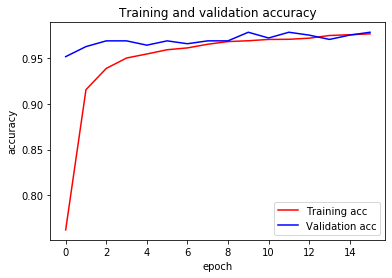

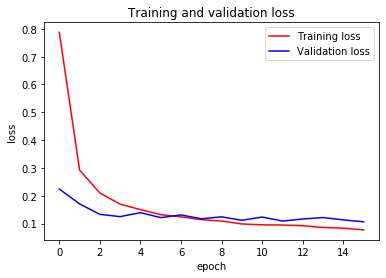

In [15]:
#Graphing our training and validation
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')  
plt.xlabel('epoch')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.ylabel('loss')  
plt.xlabel('epoch')
plt.legend()
plt.show()

## Model Evaluation on Testing Set

In [16]:
model.evaluate(test_data, test_labels)

264/264 [==============================] - 0s 170us/step


[0.06643314386945515, 0.9734848484848485]

## Classification metrics and Confusion Matrix

### Classification Metrics

In [18]:
print('test data', test_data)
preds = np.round(model.predict(test_data),0) 
#to fit them into classification metrics and confusion metrics, some additional modificaitions are required
print('rounded test_labels', preds)

test data [[[[0.14828339 0.         0.         ... 0.         0.73502684
    0.        ]
   [0.07818928 0.         0.         ... 0.         0.6785727
    0.        ]
   [0.         0.         0.         ... 0.         0.7081174
    0.        ]
   ...
   [0.         0.         0.         ... 0.         0.70976907
    0.        ]
   [0.03267553 0.         0.         ... 0.         0.77027166
    0.        ]
   [0.14074472 0.         0.         ... 0.         0.8233284
    0.        ]]

  [[0.4462805  0.         0.         ... 0.         0.5144168
    0.        ]
   [0.40695798 0.         0.         ... 0.         0.55653715
    0.        ]
   [0.2543795  0.         0.43632835 ... 0.         0.7577369
    0.        ]
   ...
   [1.1090521  0.         0.07698482 ... 0.         0.87561
    0.        ]
   [0.34118268 0.         0.         ... 0.         0.6929612
    0.        ]
   [0.24402753 0.         0.         ... 0.         0.71749514
    0.        ]]

  [[0.23521587 0.         0.     

In [19]:
animals = ['0', '1','2','3','4','5','6','7','8','9']
classification_metrics = metrics.classification_report(test_labels, preds, target_names=animals )
print(classification_metrics)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00         6
           5       1.00      1.00      1.00         6
           6       1.00      1.00      1.00         6
           7       1.00      1.00      1.00         6
           8       1.00      1.00      1.00         6
           9       1.00      1.00      1.00         6

   micro avg       1.00      1.00      1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60
 samples avg       1.00      1.00      1.00        60



### Confusion Matrix

In [20]:
#Since our data is in dummy format we put the numpy array into a dataframe and call idxmax axis=1 to return the column
# label of the maximum value thus creating a categorical variable
#Basically, flipping a dummy variable back to it's categorical variable
categorical_test_labels = pd.DataFrame(test_labels).idxmax(axis=1)
categorical_preds = pd.DataFrame(preds).idxmax(axis=1)

In [21]:
confusion_matrix= confusion_matrix(categorical_test_labels, categorical_preds)

In [22]:
#To get better visual of the confusion matrix:
def plot_confusion_matrix(cm, classes,
             normalize=False,
             title='Confusion matrix',
             cmap=plt.cm.Blues):
    #Add Normalization Option
    '''prints pretty confusion metric with normalization option '''
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
#         print()
    
#     print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes)+1)
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


Confusion matrix, without normalization


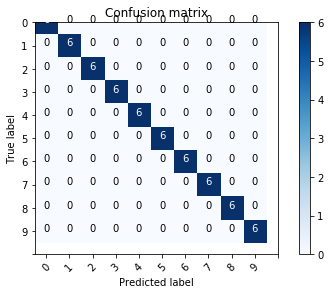

In [23]:
plot_confusion_matrix(confusion_matrix,['0', '1','2','3','4','5','6','7','8','9'])

Normalized confusion matrix


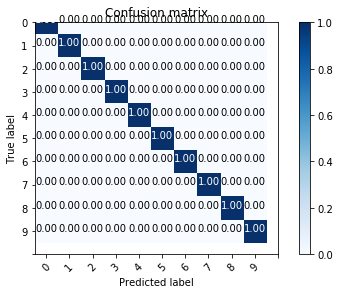

In [24]:
#Those numbers are all over the place. Now turning normalize= True
plot_confusion_matrix(confusion_matrix, 
                      ['0', '1','2','3','4','5','6','7','8','9'],
                     normalize=True)

## Testing images on model

In [141]:
def read_image(file_path):
#     print("[INFO] loading and preprocessing image...")  
    image = load_img(file_path, target_size=(224, 224))  
    image = img_to_array(image)  
    image = np.expand_dims(image, axis=0)
    image /= 255.  
    return image

In [174]:
def test_single_image(path):
    animals = ['0', '1','2','3','4','5','6','7','8','9']
    images = read_image(path)
    time.sleep(.5)
    bt_prediction = vgg16.predict(images)  
    preds = model.predict_proba(bt_prediction)
    for idx, animal, x in zip(range(0,10), animals , preds[0]):
        print("ID: {}, Label: {} {}%".format(idx, animal, round(x*100,2) ))
    print('Final Decision:')
    time.sleep(.5)
    for x in range(3):
        print('.'*(x+1))
        time.sleep(.2)
    class_predicted = model.predict_classes(bt_prediction)
    class_dictionary = generator_top.class_indices  
    inv_map = {v: k for k, v in class_dictionary.items()}  
    print("ID: {}, Label: {}".format(class_predicted[0], inv_map[class_predicted[0]]))  

    return load_img(path)

In [175]:

path = 'a00864.png'
# os.chdir('training-a')

ID: 0, Label: 0 0.19%
ID: 1, Label: 1 0.02%
ID: 2, Label: 2 0.04%
ID: 3, Label: 3 0.02%
ID: 4, Label: 4 1.14%
ID: 5, Label: 5 96.15%
ID: 6, Label: 6 0.81%
ID: 7, Label: 7 1.33%
ID: 8, Label: 8 0.21%
ID: 9, Label: 9 0.1%
Final Decision:
.
..
...
ID: 5, Label: 5


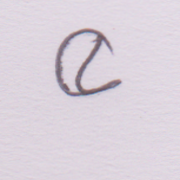

In [176]:
test_single_image(path)

In [185]:
import os
def test_multiple_image(path,name):
    animals = ['0', '1','2','3','4','5','6','7','8','9']
    images = read_image(path)
#     time.sleep(.5)
    bt_prediction = vgg16.predict(images)  
    preds = model.predict_proba(bt_prediction)
    time.sleep(.01)
    class_predicted = model.predict_classes(bt_prediction)
    class_dictionary = generator_top.class_indices  
    inv_map = {v: k for k, v in class_dictionary.items()}  
#     print("ID: {}".format(class_predicted[0]))  
    img = load_img(path)
    os.chdir(f'data3/train/{class_predicted[0]}')
    img.save(f'{name}.png')
    os.chdir('..')
    os.chdir('..')
    os.chdir('..')
    
    return None

In [186]:
c = 0
for i in range(3298,20000):
    try:
          if i<10:
            path = 'training-a/a0000'+ str(i)+'.png'
            name = 'a0000'+ str(i)
            test_multiple_image(path,name)
            continue
          if i<100:
            path = 'training-a/a000'+ str(i)+'.png'
            name = 'a000'+ str(i)
            test_multiple_image(path,name)
            continue
          if i<1000:
            path = 'training-a/a00'+ str(i)+'.png'
            name = 'a00'+ str(i)
            test_multiple_image(path,name)
            continue
          if i<10000:
            path = 'training-a/a0'+ str(i)+'.png'
            name = 'a0'+ str(i)
            test_multiple_image(path,name)
            continue
          if i<100000:
            path = 'training-a/a'+ str(i)+'.png'
            name = 'a'+ str(i)
            test_multiple_image(path,name)
            continue
    except FileNotFoundError:
        c = c+1
        continue

In [146]:
os.getcwd()

'C:\\Users\\Sakib\\Documents\\GitHub\\animal-image-classifications'

In [133]:
# try:
#   print(x)
# except FileNotFoundError:
#   print("Variable x is not defined")

NameError: name 'x' is not defined

In [149]:
c

20000

In [150]:
path

'taining-a/a19999'

In [178]:
os.getcwd()

'C:\\Users\\Sakib\\Documents\\GitHub\\animal-image-classifications'

In [177]:
os.chdir('..')

In [184]:
i

3297

In [27]:
import joblib
joblib.dump(vgg16, 'mlbrain_CNNvgg.joblib')

['mlbrain_CNNvgg.joblib']

In [36]:
joblib.dump(model, 'mlbrain_CNNmodel.joblib')

['mlbrain_CNNmodel.joblib']